In [1]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/gdrive', force_remount=True)
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import sys
sys.path.append('/gdrive/My Drive/Colab Notebooks/rl_parkingplacefinder')
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/gdrive/My Drive/Colab Notebooks/rl_parkingplacefinder']


In [3]:
import simple_q_learning
from simple_q_learning import *

import Parking_lot
from Parking_lot import *
from Park_Finder_Agent import Park_Finder_Agent
from Park_Finder_Agent import Reward_Parameters



/usr/local/lib/python3.6/dist-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


## Start from different values in Q-table

/gdrive/My Drive/Colab Notebooks/rl_parkingplacefinder/Parking_lot.py:215: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()




Start learning: 12-12-19 10 03 09 - nr episodes: 60000
nr_occupied_parking_slots: 9
best parking slot: 40
best_walk_distance: 2


Early stopping because of no changes
End learning: 12-12-19 10 03 59


<Figure size 432x288 with 0 Axes>

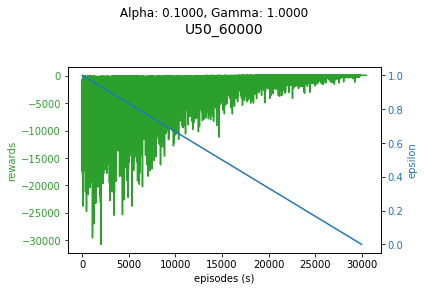

--- Frame summary -----------
Timestep: 30529
Resulting state: 40
Path lenght: 11
Reward: 90
Found parking: True
Walking distance: 2
Driving distance: 10
Start learning: 12-12-19 10 03 59 - nr episodes: 60000
nr_occupied_parking_slots: 9
best parking slot: 40
best_walk_distance: 2


Early stopping because of no changes
End learning: 12-12-19 10 04 49


<Figure size 432x288 with 0 Axes>

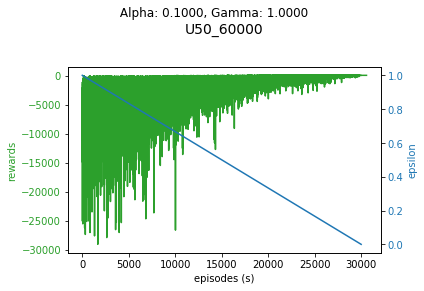

--- Frame summary -----------
Timestep: 30577
Resulting state: 40
Path lenght: 11
Reward: 90
Found parking: True
Walking distance: 2
Driving distance: 10
Start learning: 12-12-19 10 04 50 - nr episodes: 60000
nr_occupied_parking_slots: 9
best parking slot: 40
best_walk_distance: 2


Early stopping because of no changes
End learning: 12-12-19 10 05 41


<Figure size 432x288 with 0 Axes>

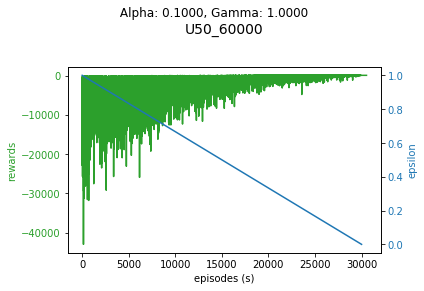

--- Frame summary -----------
Timestep: 30533
Resulting state: 40
Path lenght: 11
Reward: 90
Found parking: True
Walking distance: 2
Driving distance: 10


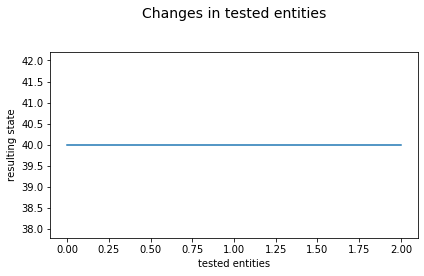

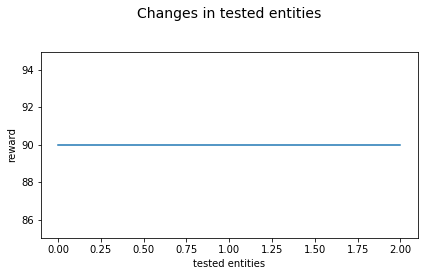

In [4]:
utils = Utils()

agent, lmp, parking_environment, file_sufix = create_base_test_scenario(nr_episodes=60000)
Q_0 = {}
Q_1000 = {}
q_neg3000 = {}
for state in agent.stateSpacePlus:
    for action in agent.possibleActions:
        Q_0[state, action] = 0
        Q_1000[state,action] = 1000
        q_neg3000 [state, action] = -3000

save_qt=True
plot_rewards=True
last_frames =[]

# q nulls
agent, lmp, parking_environment, file_sufix = create_base_test_scenario(nr_episodes=60000)

Q_0, last_frame = doLearning(agent=agent, parking_environment=parking_environment, 
                    Q=Q_0, lmp=lmp, save_qt=save_qt, save_frames=False,
                    plot_rewards=plot_rewards)
last_frames.append(last_frame)
utils.print_frame_summary(last_frame)

# q 1000
Q_1000, last_frame = doLearning(agent=agent, parking_environment=parking_environment, 
                    Q=Q_1000, lmp=lmp, save_qt=save_qt, save_frames=False,
                    plot_rewards=plot_rewards)
last_frames.append(last_frame)
utils.print_frame_summary(last_frame)


# q 1000
q_neg3000, last_frame = doLearning(agent=agent, parking_environment=parking_environment, 
                    Q=q_neg3000, lmp=lmp, save_qt=save_qt, save_frames=False,
                    plot_rewards=plot_rewards)
last_frames.append(last_frame)
utils.print_frame_summary(last_frame)

plot_field_from_last_frames(frames=last_frames, field_name='resulting state',
                              x_range=range(len(last_frames)), x_label='tested entities', title_str='Changes in tested entities')
plot_field_from_last_frames(frames=last_frames, field_name='reward',
                              x_range=range(len(last_frames)), x_label='tested entities', title_str='Changes in tested entities')
